In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
NUM_TRIALS = 100000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [21]:
class Bandit:
  def __init__(self, p):
    # p : win rate
    self.p = p
    self.p_estimate = 1.
    self.N = 0.

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1
    self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N

In [22]:
def ucb1(mean, n, nj):
  return mean * np.sqrt(2 * np.log(n) / nj)

In [23]:
def run_experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
  rewards = np.empty(NUM_TRIALS)
  total_plays = 0

  # inititially play each bandit once
  for j in range(len(bandits)):
    x = bandits[j].pull()
    total_plays += 1
    bandits[j].update(x)

  for i in range(NUM_TRIALS):
    j = np.argmax([ucb1(b.p_estimate, total_plays, b.N) for b in bandits])
    x = bandits[j].pull()
    total_plays += 1
    bandits[j].update(x)

    rewards[i] = x

  cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)


  # plot moving average
  plt.plot(cumulative_average)
  plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.p_estimate)

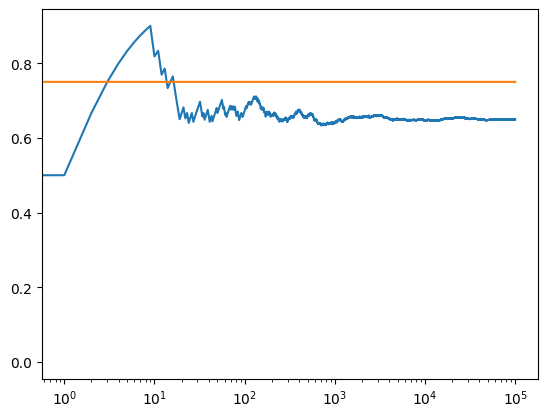

0.20150187734668365
0.4964419540032328
0.7484422262552911


In [24]:
run_experiment()